In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


%matplotlib inline
plt.style.use('ggplot')


## Loading Dataset

In [2]:
#Loading the dataset
data = pd.read_csv('master.csv')
data.shape

(27820, 12)

In [3]:
data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


# B. Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


- HDI for year has lots of missing data
- Later dropped HDI because of the missing data

In [5]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
#Suicide rate grouped by country
dfs= data[['suicides_no','population','gdp_per_capita ($)', 'country']].groupby('country').sum() 
#sort the values of the suicide numbers by number in descending order
dfs = dfs.sort_values('suicides_no', ascending=False)
#Display top 20 countries
dfs.head(20)

,suicides_no,population,gdp_per_capita ($)
country,,,
Russian Federation,1209742,3690802620,2112096
United States,1034013,8054027201,14608296
Japan,806902,3681024844,13539888
France,329127,1670756775,11333328
Ukraine,319950,1286469184,627492
Germany,291262,2024875612,10971240
Republic of Korea,261730,1354944936,5506068
Brazil,226613,4856093548,2266032
Poland,139098,866180029,2346180


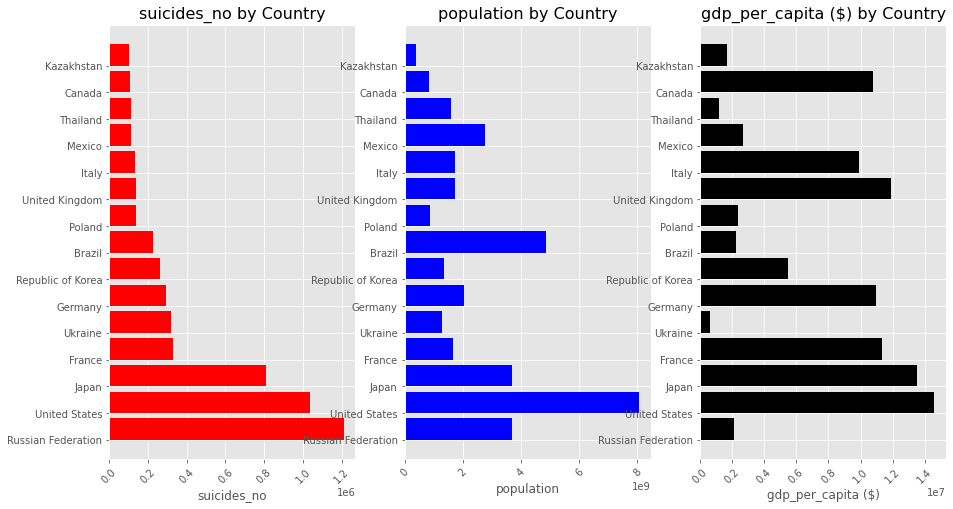

In [7]:

dfs = dfs.head(15)
params = ['suicides_no','population','gdp_per_capita ($)']
axes =[0,1,2]
color =['red','blue','black']
f, axes = plt.subplots(1,3, figsize=(15,8))

for ax, item, c in zip(axes,params, color):
    ax.barh(y = dfs.index.values, width = dfs[item], color=c, align='edge')
    ax.set_title(item+' by Country', fontsize=16)
    ax.set_xlabel(item, fontsize=12)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)


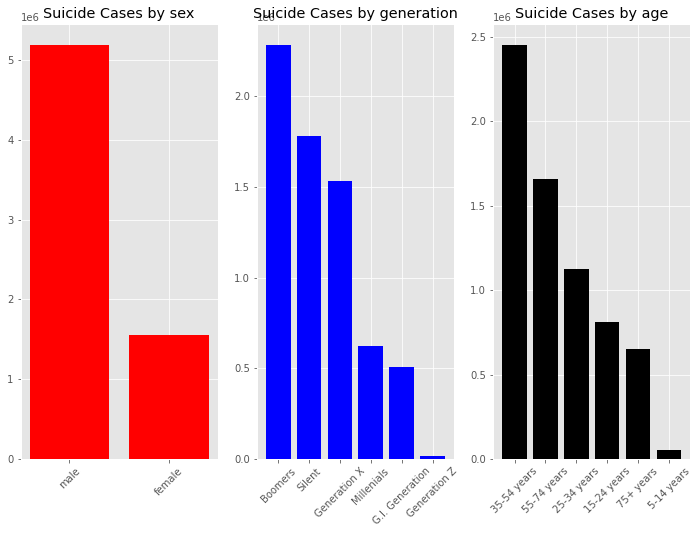

In [8]:
#Explore if there are different rates of suicide based on other demographies 

categories = ['sex','generation','age']
axes =[0,1,2]
color =['red','blue','black']

f, axes = plt.subplots(1,3,figsize=(12,8))
for ax, item, c in zip(axes,categories, color):
    dfc = data[['suicides_no', item]].groupby(item).sum()
    dfc = dfc.sort_values(by='suicides_no', ascending=False)
    x = dfc.index.values
    height = dfc['suicides_no']
    ax.bar(x, height, color=c)
    ax.set_title('Suicide Cases by ' + item)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)


### Notes
- Suicide rates higher in ages between **35 and 54** years.
- **Boomers generation** has highest rates of suicide
- More males commit suicide than females
- Oldest and youngest population have the lowest levels of suicide.

# C. Dataset preparation: Data preprocessing and Feature engineering

In [9]:
df = data.copy()

In [10]:
#Check data again to identify features to drop and engineer
a = df['HDI for year'].isna().sum()
b = df.shape[0]
print(f'Rate of missing data in HDI for year is: {100*a/b :.0f}%')

Rate of missing data in HDI for year is: 70%


In [11]:
#drop column with missing data
df.drop('HDI for year', axis=1, inplace=True)

In [12]:
df['country-year'].str[-4:].astype('int')

0        1987
1        1987
2        1987
3        1987
4        1987
         ... 
27815    2014
27816    2014
27817    2014
27818    2014
27819    2014
Name: country-year, Length: 27820, dtype: int32

In [13]:
#Identify columns that can be re-engineered to get more features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [14]:
#Re-engineer some of the features to improve model

df['country-year'] = df['country-year'].str[-4:].astype('int') #Change str type data to int
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',','').astype('int64') 

#Encoding 
df['sex'] = df['sex'].map({'female':0, 'male':1}) 
df['age'] = df['age'].map({'5-14 years':0,'15-24 years':1,'25-34 years':2,'35-54 years':3,'55-74 years':4,'75+ years':5}) 




# D. Supervised Machine Learning 

## Using Unnormalized Dataset

In [15]:
df1 = df[['suicides_no', 'population',' gdp_for_year ($) ','gdp_per_capita ($)']]


### Defining train and test datasets


In [16]:
x = df1.drop('suicides_no', axis=1)
y = df1['suicides_no']
X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=101)


### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
print(f'Test_R_Sqrd: {lr.score(X_test, y_test):.4f}\nTrain_R_Sqrd: {lr.score(X_train,y_train):.4f}\n')


Test_R_Sqrd: 0.3882
Train_R_Sqrd: 0.3778



### Ridge Regression

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge1 = Ridge(alpha=0.1)
ridge1.fit(X_train, y_train)
print(f'Ridge Test_R_Sqrd: {ridge1.score(X_test, y_test):.4f}\nTrain_R_Sqrd: {ridge1.score(X_train,y_train):.4f}\n')



Ridge Test_R_Sqrd: 0.3882
Train_R_Sqrd: 0.3778



### Lasso Regression

In [19]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(max_iter=100000, alpha=0.01)
lasso1.fit(X_train, y_train)

print(f'Best Lasso Test_R_Sqrd: {lasso1.score(X_test, y_test):.4f}\nTrain_R_Sqrd: {lasso1.score(X_train,y_train):.4f}')


Best Lasso Test_R_Sqrd: 0.3882
Train_R_Sqrd: 0.3778


## Notes
- The 3 regression models perform poorly on the unstandardized dataset with accuracies below average


## Normalizing the Data

In [20]:
#Standardizing large numbers using log transformations
df=df.copy()
df['annual_gdp_log'] = np.where(df[' gdp_for_year ($) '] != 0, np.log(df[' gdp_for_year ($) ']), 0) 
df['population_log'] = np.where(df['population'] != 0, np.log(df['population']), 0)
df['target_log'] = np.where(df['suicides_no'] != 0, np.log(df['suicides_no']), 0)

#scaling the numerical features


scaler = StandardScaler()
df_scaled = df.drop(['country', 'country-year','generation'], axis=1)
df_scaled = df_scaled[['sex', 'age', 'annual_gdp_log','population_log', 'target_log']]


df_scaled['scaled_pop'] = scaler.fit_transform(df_scaled['population_log'].values.reshape(-1,1))
df_scaled['scaled_gdp'] = scaler.fit_transform(df_scaled['annual_gdp_log'].values.reshape(-1,1))
df_scaled = df_scaled.drop(['annual_gdp_log', 'population_log'], axis=1)

C:\Users\glubi\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
#Defining train and test datasets
x = df_scaled.drop('target_log', axis=1)
y = df_scaled['target_log']
X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=101)

## Using Unnormalized Dataset

### Linear Regression Model

In [22]:
lr = LinearRegression().fit(X_train,y_train)
print(f'Test_R_Sqrd: {lr.score(X_test, y_test):.4f}\nTrain_R_Sqrd: {lr.score(X_train,y_train):.4f}')

Test_R_Sqrd: 0.7677
Train_R_Sqrd: 0.7608


### Ridge Regression

In [23]:
ridge = Ridge().fit(X_train, y_train)
print(f'Test_R_Sqrd: {ridge.score(X_test, y_test):.4f}\nTrain_R_Sqrd: {ridge.score(X_train,y_train):.4f}')

Test_R_Sqrd: 0.7677
Train_R_Sqrd: 0.7608


In [24]:
ridge1 = Ridge()
param_grid = {'alpha': [_ for _ in [0.01,0.1,1,10, 100]]}
grid_ridge= GridSearchCV(ridge1, param_grid, 
                 cv=5, return_train_score=True)#GridSearchCV with cross-validation cv=5
grid_ridge.fit(X_train, y_train)
print(f'Best Test_R_Sqrd: {grid_ridge.score(X_test, y_test):.4f}\nTrain_R_Sqrd: {grid_ridge.score(X_train,y_train):.4f}')

Best Test_R_Sqrd: 0.7677
Train_R_Sqrd: 0.7608


### Lasso Regression

In [25]:
lasso = Lasso()
param_grid = {'alpha': [_ for _ in [0.01,0.1,1,10, 100,1000]], 'max_iter':[_ for _ in [1000, 10000,100000,1000000]]}
grid_lasso= GridSearchCV(lasso, param_grid, 
                 cv=5, return_train_score=True)#GridSearchCV with cross-validation cv=5
grid_lasso.fit(X_train, y_train)
print(f'Best Test_R_Sqrd: {grid_lasso.score(X_test, y_test):.4f}\nTrain_R_Sqrd: {grid_lasso.score(X_train,y_train):.4f}')


Best Test_R_Sqrd: 0.7671
Train_R_Sqrd: 0.7606


### Random Forest Regressor

In [26]:
#df_scaled.columns


In [27]:
#Standardizing large numbers using log transformations
df=df.copy()
df['annual_gdp_log'] = np.where(df[' gdp_for_year ($) '] != 0, np.log(df[' gdp_for_year ($) ']), 0) 
df['population_log'] = np.where(df['population'] != 0, np.log(df['population']), 0)
df['target_log'] = np.where(df['suicides_no'] != 0, np.log(df['suicides_no']), 0)

#scaling the numerical features for Random forest

scaler = StandardScaler()
df_scaled = df.drop(['country', 'country-year','generation'], axis=1)
df_scaled = df_scaled[['sex', 'age', 'annual_gdp_log','population_log', 'target_log']]


df_scaled['scaled_pop'] = scaler.fit_transform(df_scaled['population_log'].values.reshape(-1,1))
df_scaled['scaled_gdp'] = scaler.fit_transform(df_scaled['annual_gdp_log'].values.reshape(-1,1))
df_scaled = df.drop(['annual_gdp_log', 'population_log'], axis=1)

C:\Users\glubi\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:

#Fitting Random Forest Regressor with default parameters

ran_forest = RandomForestRegressor(n_estimators=100, criterion='mse', max_features='auto', n_jobs=-1)
ran_forest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
actual = np.round(np.exp(y_test))
predicted = np.round(np.exp(ran_forest.predict(X_test)))
print(f'Train score: {ran_forest.score(X_train,y_train):.2f}')
print(f'Test score: {ran_forest.score(X_test,y_test):.2f}')


Train score: 0.99
Test score: 0.91


In [30]:
#report = classification_report(actual, predicted, output_dict=True)
#report_df = pd.DataFrame(report).transpose()

In [31]:
#precision=report_df['precision'].mean()
#recall=report_df['recall'].mean()
#f1_score =report_df['f1-score'].mean()

In [32]:
#plot for feature importance
def plot_feature_importance(model):
    plt.barh(y=X_train.columns.values, width=model.feature_importances_, align = 'center')
    plt.xlabel('Feature importances')
    plt.ylabel('Features')

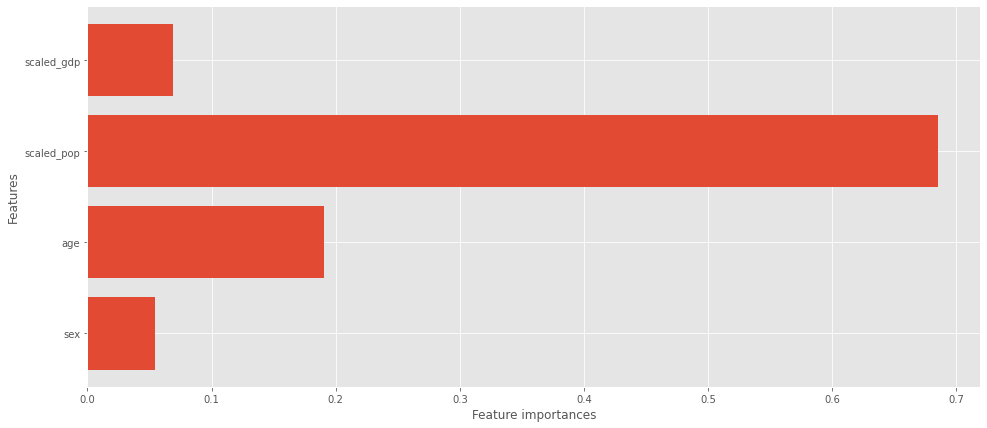

In [33]:
plt.figure(figsize=(16,7))
plot_feature_importance(ran_forest)

Text(0, 0.5, 'Residuals')

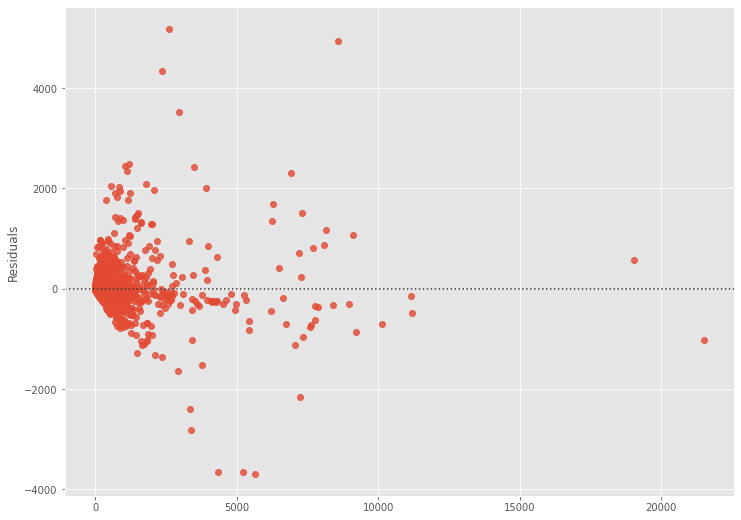

In [34]:
#Definining residuals
residuals= actual-predicted

#Plot didtribution of residuals 
f,axes=plt.subplots(figsize=(12,9))
sns.residplot(x = predicted, y = actual, ax=axes)
plt.ylabel('Residuals')

### Cross-Validation Score

In [35]:

model = RandomForestRegressor(n_estimators=100, criterion='mse', max_features='auto', n_jobs=-1)
scores = cross_val_score(model, x, y, cv=5)#cross validation score performing 5 fold cross-validation
print(f"Scores: {scores}\n\nMean_Scores: {scores.mean():.2f}")

Scores: [0.83819718 0.76343841 0.77310383 0.84085899 0.71707942]

Mean_Scores: 0.79


## Conclusion
- On the normalized dataset, the accuracy for Linear Regression, Ridge and Lasso models increased to 76% on average
- The Random forest model was the best with 99% accurate on training dataset and 91% accurate on the test data
- In the random forests model, there is relatively moderately high variance in the accuracy between folds ranging from 71% to 84%
- Population was the most important feature in explaining the suicide numbers per country based on the output of the random forests model